In [4]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np 
import os
RD_SCORE = 0
LG_SCORE = 0
KNN_SCORE = 0
FUZZY_SCORE = 0
SVM_SCORE = 0.83
global fuzzy_data 
global fuzzy_classi_predictor

## Data Cleaning

In [5]:
df = pd.read_csv("test.csv")

In [6]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.shape

(4238, 16)

In [8]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [10]:
columns = df.columns

In [11]:
for col in columns:
    print(col, sum(pd.isnull(df[col])))

male 0
age 0
education 105
currentSmoker 0
cigsPerDay 29
BPMeds 53
prevalentStroke 0
prevalentHyp 0
diabetes 0
totChol 50
sysBP 0
diaBP 0
BMI 19
heartRate 1
glucose 388
TenYearCHD 0


In [12]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(df)

new_data = imp.transform(df)

In [13]:
df = pd.DataFrame(new_data, columns=columns)

In [14]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [15]:
for col in columns:
    print(col, sum(pd.isnull(df[col])))

male 0
age 0
education 0
currentSmoker 0
cigsPerDay 0
BPMeds 0
prevalentStroke 0
prevalentHyp 0
diabetes 0
totChol 0
sysBP 0
diaBP 0
BMI 0
heartRate 0
glucose 0
TenYearCHD 0


## Data Visualization

In [16]:
df["TenYearCHD"] = df["TenYearCHD"].map(lambda x: int(x))

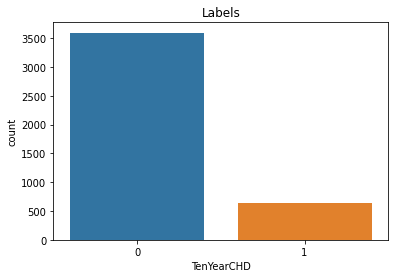

In [17]:
sns.countplot(df["TenYearCHD"])
plt.title("Labels")
plt.show()

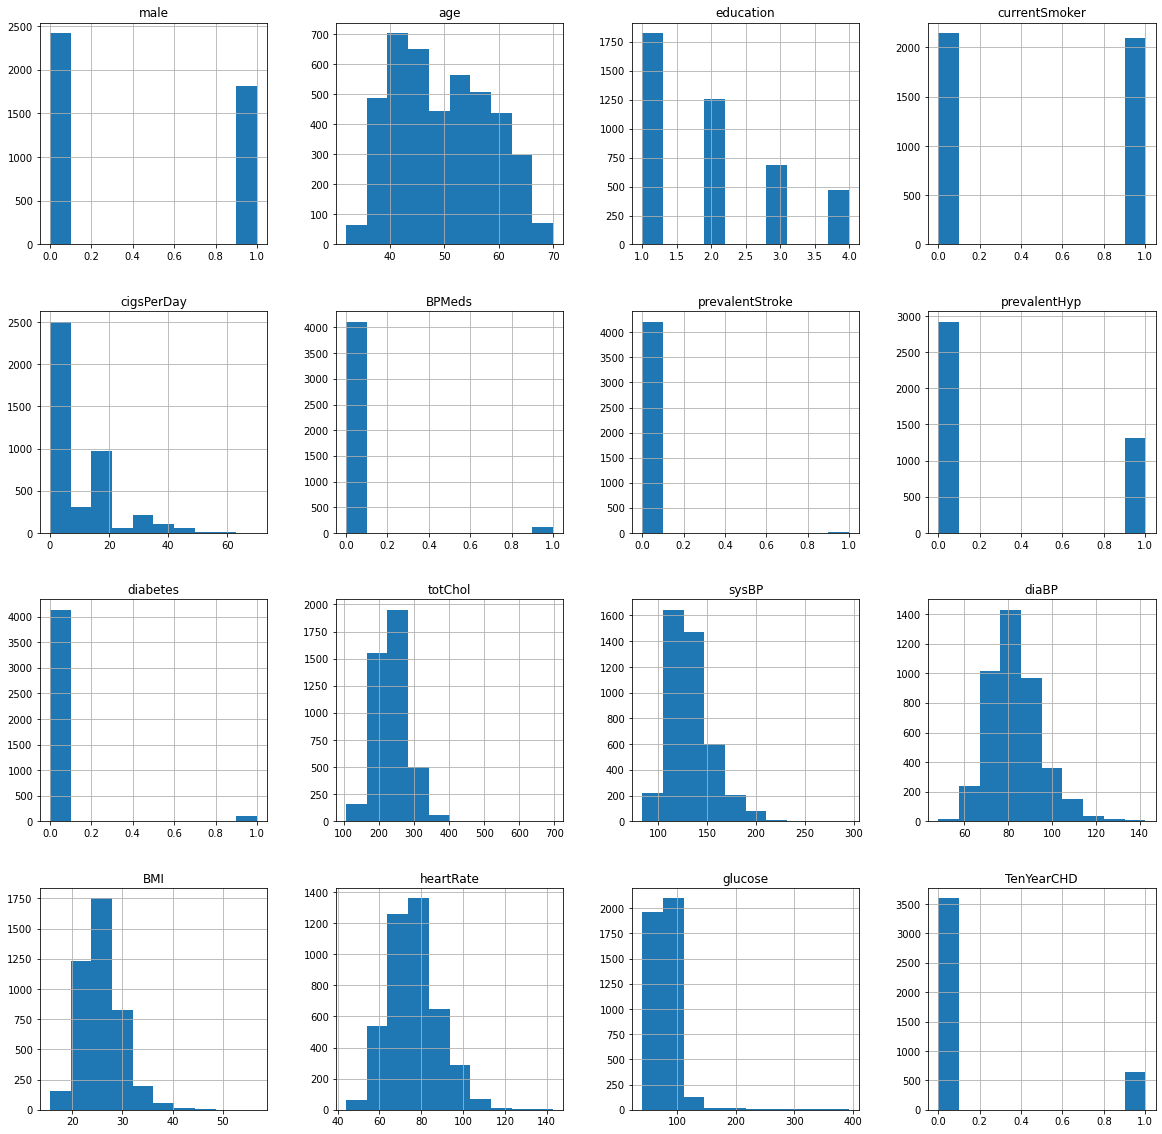

In [18]:
df.hist(figsize=(20, 20))
plt.show()

In [19]:
labels = df.pop("TenYearCHD").values
df = df.values

## Data Training using Tensorflow

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df ,labels,
                                                    test_size=.1,
                                                    random_state=5)

In [21]:
print("shape x_train:", x_train.shape)
print("shape y_train:", y_train.shape)
print("shape x_test:", x_test.shape)
print("shape y_test:", y_test.shape)

shape x_train: (3814, 15)
shape y_train: (3814,)
shape x_test: (424, 15)
shape y_test: (424,)


In [22]:
def min_max_normalized(df):
    col_max = np.max(df, axis=0)
    col_min = np.min(df, axis=0)
    return np.divide(df - col_min, col_max - col_min)

In [23]:
x_train = min_max_normalized(x_train)
x_test = min_max_normalized(x_test)

In [24]:
x_train = tf.cast(x_train, dtype=tf.float32)
y_train = tf.cast(y_train, dtype=tf.float32)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(128)


x_test = tf.cast(x_test, dtype=tf.float32)
y_test = tf.cast(y_test, dtype=tf.float32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(128)

In [25]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(15,)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [27]:
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
H = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
30/30 [==============================] - 0s 11ms/step - loss: 0.7353 - accuracy: 0.4284 - val_loss: 0.6482 - val_accuracy: 0.6392
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7016 - val_loss: 0.5592 - val_accuracy: 0.8090
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.8230 - val_loss: 0.5170 - val_accuracy: 0.8160
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.8492 - val_loss: 0.5094 - val_accuracy: 0.8160
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.8521 - val_loss: 0.5066 - val_accuracy: 0.8160
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8511 - val_loss: 0.4993 - val_accuracy: 0.8160
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.8511 - val_loss: 0.4943 - val_accuracy: 0.8160
Epoch 8/10
30/30 [=

In [29]:
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

print(type(H.history['acc']))
print(max(H.history['acc']))

KeyError: 'acc'

In [ ]:
def algorithm_u(ns, m):

    def visit(n, a):
        ps = [[] for i in range(m)]
        for j in range(n):
            ps[a[j + 1]].append(ns[j])
        return ps

    def f(mu, nu, sigma, n, a):
        if mu == 2:
            yield visit(n, a)
        else:
            for v in f(mu - 1, nu - 1, (mu + sigma) % 2, n, a):
                yield v
        if nu == mu + 1:
            a[mu] = mu - 1
            yield visit(n, a)
            while a[nu] > 0:
                a[nu] = a[nu] - 1
                yield visit(n, a)
        elif nu > mu + 1:
            if (mu + sigma) % 2 == 1:
                a[nu - 1] = mu - 1
            else:
                a[mu] = mu - 1
            if (a[nu] + sigma) % 2 == 1:
                for v in b(mu, nu - 1, 0, n, a):
                    yield v
            else:
                for v in f(mu, nu - 1, 0, n, a):
                    yield v
            while a[nu] > 0:
                a[nu] = a[nu] - 1
                if (a[nu] + sigma) % 2 == 1:
                    for v in b(mu, nu - 1, 0, n, a):
                        yield v
                else:
                    for v in f(mu, nu - 1, 0, n, a):
                        yield v

    def b(mu, nu, sigma, n, a):
        if nu == mu + 1:
            while a[nu] < mu - 1:
                yield visit(n, a)
                a[nu] = a[nu] + 1
            yield visit(n, a)
            a[mu] = 0
        elif nu > mu + 1:
            if (a[nu] + sigma) % 2 == 1:
                for v in f(mu, nu - 1, 0, n, a):
                    yield v
            else:
                for v in b(mu, nu - 1, 0, n, a):
                    yield v
            while a[nu] < mu - 1:
                a[nu] = a[nu] + 1
                if (a[nu] + sigma) % 2 == 1:
                    for v in f(mu, nu - 1, 0, n, a):
                        yield v
                else:
                    for v in b(mu, nu - 1, 0, n, a):
                        yield v
            if (mu + sigma) % 2 == 1:
                a[nu - 1] = 0
            else:
                a[mu] = 0
        if mu == 2:
            yield visit(n, a)
        else:
            for v in b(mu - 1, nu - 1, (mu + sigma) % 2, n, a):
                yield v

    n = len(ns)
    a = [0] * (n + 1)
    for j in range(1, m + 1):
        a[n - m + j] = j - 1
    return f(m, n, 0, n, a)

class algorithm_u_permutations:

    from itertools import permutations

    def __init__(self, ns, m):

        self.au = algorithm_u(ns, m)
        self.perms = self.permutations(next(self.au))

    def __next__(self):

        try:
            return next(self.perms)

        except StopIteration:
            self.perms = self.permutations(next(self.au))
            return next(self.perms)

    def __iter__(self):
        return self

## Data Training using Supervised Learning Algorithms

In [30]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# load dataset
X = df
Y = labels

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RAN', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    model.fit(X, Y)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    if(name == 'LR'):
        LG_SCORE = cv_results.mean()
    elif(name == 'RAN'):
        RD_SCORE = cv_results.mean()
    else:
        KNN_SCORE = cv_results.mean()
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [31]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

# Logistic Regression Implementation

In [29]:
logi_model = LogisticRegression()
logi_predict = logi_model.fit(X, Y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [31]:
data = pd.read_csv('test.csv')
column = data.columns
logi_result = logi_predict.predict(X_test)
column_count = X_test.shape[1]
row_count = X_test.shape[0]

for x in range(row_count):
    for y in range(column_count):
        print("{}) {} = {}\t".format(y+1, column[y], X_test[x][y]), end='')
    if(logi_result[x] == 1):
        print("\nPrediction: Yes, you are having heart disease")
    else:
        print("\nPrediction: No, you are not having heart disease")
    print()    

1) male = 0.0	2) age = 59.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 205.0	11) sysBP = 142.5	12) diaBP = 74.5	13) BMI = 25.63	14) heartRate = 85.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 63.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 228.0	11) sysBP = 141.0	12) diaBP = 82.0	13) BMI = 25.84	14) heartRate = 82.0	15) glucose = 81.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 41.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 180.0	11) sysBP = 127.0	12) diaBP = 86.0	13) BMI = 20.72	14) heartRate = 73.0	15) glucose = 63.0	
Prediction: No, you are not having heart disease


Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 53.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 221.0	11) sysBP = 131.0	12) diaBP = 89.0	13) BMI = 24.09	14) heartRate = 90.0	15) glucose = 95.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 44.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 234.0	11) sysBP = 135.0	12) diaBP = 88.0	13) BMI = 25.65	14) heartRate = 52.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 48.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 231.0	11) sysBP = 121.0	12) diaBP = 81.0	13) BMI = 27.56	14) heartRate = 70.0	15) glucose = 85.0	


1) male = 0.0	2) age = 45.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 184.0	11) sysBP = 147.0	12) diaBP = 88.0	13) BMI = 23.48	14) heartRate = 66.0	15) glucose = 76.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 54.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 5.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 272.0	11) sysBP = 132.5	12) diaBP = 91.0	13) BMI = 23.09	14) heartRate = 70.0	15) glucose = 78.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 50.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 240.0	11) sysBP = 145.0	12) diaBP = 94.0	13) BMI = 28.86	14) heartRate = 60.0	15) glucose = 68.0	
Prediction: No, you are not having heart disease



1) male = 0.0	2) age = 36.0	3) education = 3.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 295.0	11) sysBP = 114.5	12) diaBP = 72.0	13) BMI = 24.11	14) heartRate = 85.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 46.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 275.0	11) sysBP = 116.0	12) diaBP = 88.5	13) BMI = 28.04	14) heartRate = 70.0	15) glucose = 70.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 38.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 15.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 220.0	11) sysBP = 119.5	12) diaBP = 85.5	13) BMI = 31.39	14) heartRate = 70.0	15) glucose = 85.0	
Prediction: No, you are not having heart disease



1) male = 1.0	2) age = 58.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 30.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 200.0	11) sysBP = 144.0	12) diaBP = 90.0	13) BMI = 24.9	14) heartRate = 75.0	15) glucose = 76.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 42.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 214.0	11) sysBP = 120.0	12) diaBP = 81.0	13) BMI = 28.47	14) heartRate = 78.0	15) glucose = 77.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 52.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 1.0	10) totChol = 600.0	11) sysBP = 159.5	12) diaBP = 94.0	13) BMI = 28.27	14) heartRate = 78.0	15) glucose = 140.0	
Prediction: No, you are not having heart disease



1) male = 1.0	2) age = 63.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 15.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 207.0	11) sysBP = 165.0	12) diaBP = 100.0	13) BMI = 21.33	14) heartRate = 72.0	15) glucose = 77.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 55.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 198.0	11) sysBP = 136.0	12) diaBP = 93.0	13) BMI = 22.54	14) heartRate = 85.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 41.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 203.0	11) sysBP = 124.0	12) diaBP = 86.0	13) BMI = 28.25	14) heartRate = 83.0	15) glucose = 80.0	
Prediction: No, you are not having heart disease


1) male = 1.0	2) age = 58.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 15.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 175.0	11) sysBP = 83.5	12) diaBP = 58.0	13) BMI = 29.66	14) heartRate = 95.0	15) glucose = 115.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 50.0	3) education = 3.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 240.0	11) sysBP = 165.0	12) diaBP = 100.0	13) BMI = 24.59	14) heartRate = 75.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 48.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 5.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 172.0	11) sysBP = 114.0	12) diaBP = 80.0	13) BMI = 21.33	14) heartRate = 60.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease


1) male = 1.0	2) age = 48.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 170.0	11) sysBP = 122.0	12) diaBP = 70.0	13) BMI = 23.62	14) heartRate = 90.0	15) glucose = 73.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 42.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 183.0	11) sysBP = 111.0	12) diaBP = 71.0	13) BMI = 19.78	14) heartRate = 66.0	15) glucose = 81.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 65.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 240.0	11) sysBP = 152.5	12) diaBP = 97.5	13) BMI = 28.35	14) heartRate = 65.0	15) glucose = 73.0	
Prediction: No, you are not having heart disease



1) male = 1.0	2) age = 59.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 299.0	11) sysBP = 120.5	12) diaBP = 78.0	13) BMI = 25.45	14) heartRate = 60.0	15) glucose = 100.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 56.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 60.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 246.0	11) sysBP = 125.0	12) diaBP = 79.0	13) BMI = 29.64	14) heartRate = 70.0	15) glucose = 85.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 38.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 1.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 200.0	11) sysBP = 124.0	12) diaBP = 84.0	13) BMI = 20.67	14) heartRate = 80.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease


1) male = 0.0	2) age = 54.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 272.0	11) sysBP = 146.0	12) diaBP = 95.0	13) BMI = 23.66	14) heartRate = 72.0	15) glucose = 80.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 46.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 30.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 270.0	11) sysBP = 131.0	12) diaBP = 81.0	13) BMI = 26.4	14) heartRate = 75.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 36.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 15.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 197.0	11) sysBP = 113.0	12) diaBP = 72.5	13) BMI = 22.73	14) heartRate = 70.0	15) glucose = 65.0	
Prediction: No, you are not having heart disease



1) male = 1.0	2) age = 45.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 212.0	11) sysBP = 118.0	12) diaBP = 71.0	13) BMI = 21.03	14) heartRate = 66.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 56.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 220.0	11) sysBP = 113.0	12) diaBP = 83.0	13) BMI = 25.12	14) heartRate = 58.0	15) glucose = 86.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 53.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 284.0	11) sysBP = 167.5	12) diaBP = 102.5	13) BMI = 31.5	14) heartRate = 88.0	15) glucose = 87.0	
Prediction: No, you are not having heart disease



# Random Forest

In [32]:
rf_model = RandomForestClassifier()
rf_predict = rf_model.fit(X, Y)
rf_result = rf_predict.predict(X_test)

In [33]:
data = pd.read_csv('test.csv')
column = data.columns
column_count = X_test.shape[1]
row_count = X_test.shape[0]

for x in range(row_count):
    for y in range(column_count):
        print("{}) {} = {}\t".format(y+1, column[y], X_test[x][y]), end='')
    if(rf_result[x] == 1):
        print("\nPrediction: Yes, you are having heart disease")
    else:
        print("\nPrediction: No, you are not having heart disease")
    print()  

1) male = 0.0	2) age = 59.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 205.0	11) sysBP = 142.5	12) diaBP = 74.5	13) BMI = 25.63	14) heartRate = 85.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 63.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 228.0	11) sysBP = 141.0	12) diaBP = 82.0	13) BMI = 25.84	14) heartRate = 82.0	15) glucose = 81.0	
Prediction: Yes, you are having heart disease

1) male = 1.0	2) age = 41.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 180.0	11) sysBP = 127.0	12) diaBP = 86.0	13) BMI = 20.72	14) heartRate = 73.0	15) glucose = 63.0	
Prediction: No, you are not having heart disease

1)

1) male = 0.0	2) age = 50.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 232.0	11) sysBP = 120.0	12) diaBP = 75.0	13) BMI = 23.88	14) heartRate = 60.0	15) glucose = 74.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 53.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 221.0	11) sysBP = 131.0	12) diaBP = 89.0	13) BMI = 24.09	14) heartRate = 90.0	15) glucose = 95.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 44.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 234.0	11) sysBP = 135.0	12) diaBP = 88.0	13) BMI = 25.65	14) heartRate = 52.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease



1) male = 0.0	2) age = 45.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 184.0	11) sysBP = 147.0	12) diaBP = 88.0	13) BMI = 23.48	14) heartRate = 66.0	15) glucose = 76.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 54.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 5.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 272.0	11) sysBP = 132.5	12) diaBP = 91.0	13) BMI = 23.09	14) heartRate = 70.0	15) glucose = 78.0	
Prediction: Yes, you are having heart disease

1) male = 1.0	2) age = 50.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 240.0	11) sysBP = 145.0	12) diaBP = 94.0	13) BMI = 28.86	14) heartRate = 60.0	15) glucose = 68.0	
Prediction: No, you are not having heart disease

1) 

1) male = 0.0	2) age = 56.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 40.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 214.0	11) sysBP = 147.0	12) diaBP = 65.0	13) BMI = 17.68	14) heartRate = 110.0	15) glucose = 87.0	
Prediction: Yes, you are having heart disease

1) male = 1.0	2) age = 40.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 275.0	11) sysBP = 112.5	12) diaBP = 85.0	13) BMI = 28.04	14) heartRate = 73.0	15) glucose = 71.0	
Prediction: Yes, you are having heart disease

1) male = 0.0	2) age = 48.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 1.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 234.0	11) sysBP = 120.0	12) diaBP = 81.0	13) BMI = 23.22	14) heartRate = 67.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease

1) m

1) male = 1.0	2) age = 36.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 183.0	11) sysBP = 140.0	12) diaBP = 85.0	13) BMI = 24.39	14) heartRate = 67.0	15) glucose = 84.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 58.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 30.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 200.0	11) sysBP = 144.0	12) diaBP = 90.0	13) BMI = 24.9	14) heartRate = 75.0	15) glucose = 76.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 42.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 214.0	11) sysBP = 120.0	12) diaBP = 81.0	13) BMI = 28.47	14) heartRate = 78.0	15) glucose = 77.0	
Prediction: No, you are not having heart disease

1

1) male = 0.0	2) age = 63.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 252.0	11) sysBP = 154.0	12) diaBP = 87.0	13) BMI = 28.6	14) heartRate = 72.0	15) glucose = 45.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 65.0	3) education = 3.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 344.0	11) sysBP = 120.0	12) diaBP = 75.0	13) BMI = 25.41	14) heartRate = 87.0	15) glucose = 98.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 54.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 231.0	11) sysBP = 120.0	12) diaBP = 79.0	13) BMI = 27.49	14) heartRate = 85.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1

1) male = 1.0	2) age = 55.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 214.0	11) sysBP = 132.5	12) diaBP = 85.5	13) BMI = 29.25	14) heartRate = 70.0	15) glucose = 103.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 38.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 227.0	11) sysBP = 108.0	12) diaBP = 65.5	13) BMI = 25.45	14) heartRate = 85.0	15) glucose = 110.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 58.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 15.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 175.0	11) sysBP = 83.5	12) diaBP = 58.0	13) BMI = 29.66	14) heartRate = 95.0	15) glucose = 115.0	
Prediction: No, you are not having heart diseas

1) male = 0.0	2) age = 50.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 261.0	11) sysBP = 129.0	12) diaBP = 80.0	13) BMI = 23.06	14) heartRate = 85.0	15) glucose = 90.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 48.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 170.0	11) sysBP = 122.0	12) diaBP = 70.0	13) BMI = 23.62	14) heartRate = 90.0	15) glucose = 73.0	
Prediction: Yes, you are having heart disease

1) male = 0.0	2) age = 42.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 183.0	11) sysBP = 111.0	12) diaBP = 71.0	13) BMI = 19.78	14) heartRate = 66.0	15) glucose = 81.0	
Prediction: No, you are not having heart disease

1) 

1) male = 1.0	2) age = 45.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 23.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 263.0	11) sysBP = 115.0	12) diaBP = 76.0	13) BMI = 24.94	14) heartRate = 68.0	15) glucose = 78.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 61.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 7.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 176.0	11) sysBP = 125.0	12) diaBP = 82.0	13) BMI = 29.82	14) heartRate = 70.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 38.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 3.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 180.0	11) sysBP = 115.0	12) diaBP = 86.0	13) BMI = 24.91	14) heartRate = 70.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease



1) male = 1.0	2) age = 54.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 225.0	11) sysBP = 134.5	12) diaBP = 92.5	13) BMI = 30.62	14) heartRate = 78.0	15) glucose = 69.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 65.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 253.0	11) sysBP = 111.0	12) diaBP = 60.0	13) BMI = 24.12	14) heartRate = 60.0	15) glucose = 69.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 52.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 235.0	11) sysBP = 129.5	12) diaBP = 83.0	13) BMI = 28.86	14) heartRate = 65.0	15) glucose = 79.0	
Prediction: Yes, you are having heart disease

1) m

1) male = 0.0	2) age = 44.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 194.0	11) sysBP = 117.0	12) diaBP = 78.0	13) BMI = 24.94	14) heartRate = 65.0	15) glucose = 79.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 49.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 1.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 240.0	11) sysBP = 110.0	12) diaBP = 71.0	13) BMI = 22.02	14) heartRate = 73.0	15) glucose = 84.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 47.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 215.0	11) sysBP = 128.0	12) diaBP = 85.0	13) BMI = 20.89	14) heartRate = 75.0	15) glucose = 90.0	
Prediction: No, you are not having heart disease



# KNN

In [34]:
knn_model = RandomForestClassifier()
knn_predict = knn_model.fit(X, Y)
knn_result = knn_predict.predict(X_test)

In [35]:
data = pd.read_csv('test.csv')
column = data.columns
column_count = X_test.shape[1]
row_count = X_test.shape[0]

for x in range(row_count):
    for y in range(column_count):
        print("{}) {} = {}\t".format(y+1, column[y], X_test[x][y]), end='')
    if(knn_result[x] == 1):
        print("\nPrediction: Yes, you are having heart disease")
    else:
        print("\nPrediction: No, you are not having heart disease")
    print()  

1) male = 0.0	2) age = 59.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 205.0	11) sysBP = 142.5	12) diaBP = 74.5	13) BMI = 25.63	14) heartRate = 85.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 63.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 228.0	11) sysBP = 141.0	12) diaBP = 82.0	13) BMI = 25.84	14) heartRate = 82.0	15) glucose = 81.0	
Prediction: Yes, you are having heart disease

1) male = 1.0	2) age = 41.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 180.0	11) sysBP = 127.0	12) diaBP = 86.0	13) BMI = 20.72	14) heartRate = 73.0	15) glucose = 63.0	
Prediction: No, you are not having heart disease

1)

1) male = 1.0	2) age = 61.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 238.0	11) sysBP = 119.0	12) diaBP = 78.0	13) BMI = 25.36	14) heartRate = 80.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 50.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 232.0	11) sysBP = 120.0	12) diaBP = 75.0	13) BMI = 23.88	14) heartRate = 60.0	15) glucose = 74.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 53.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 221.0	11) sysBP = 131.0	12) diaBP = 89.0	13) BMI = 24.09	14) heartRate = 90.0	15) glucose = 95.0	
Prediction: No, you are not having heart disease



1) male = 0.0	2) age = 58.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 3.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 242.0	11) sysBP = 123.0	12) diaBP = 69.0	13) BMI = 23.38	14) heartRate = 74.0	15) glucose = 72.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 54.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 1.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 201.0	11) sysBP = 156.0	12) diaBP = 93.0	13) BMI = 27.91	14) heartRate = 80.0	15) glucose = 70.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 64.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 295.0	11) sysBP = 127.0	12) diaBP = 78.0	13) BMI = 22.89	14) heartRate = 67.0	15) glucose = 73.0	
Prediction: No, you are not having heart disease

1

1) male = 0.0	2) age = 57.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 266.0	11) sysBP = 151.0	12) diaBP = 95.0	13) BMI = 38.39	14) heartRate = 96.0	15) glucose = 109.0	
Prediction: Yes, you are having heart disease

1) male = 1.0	2) age = 37.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 205.0	11) sysBP = 129.0	12) diaBP = 86.0	13) BMI = 27.27	14) heartRate = 60.0	15) glucose = 76.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 44.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 260.0	11) sysBP = 134.0	12) diaBP = 80.0	13) BMI = 22.25	14) heartRate = 87.0	15) glucose = 81.0	
Prediction: No, you are not having heart disease

1)

Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 54.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 225.0	11) sysBP = 131.0	12) diaBP = 79.0	13) BMI = 25.91	14) heartRate = 67.0	15) glucose = 62.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 57.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 200.0	11) sysBP = 117.5	12) diaBP = 80.0	13) BMI = 25.41	14) heartRate = 65.0	15) glucose = 80.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 55.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 220.0	11) sysBP = 117.5	12) diaBP = 84.0	13) BMI = 26.2	14) heartRate = 90.0	15) glucose = 75.0	
P

1) male = 1.0	2) age = 57.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 206.0	11) sysBP = 124.0	12) diaBP = 80.0	13) BMI = 23.04	14) heartRate = 66.0	15) glucose = 60.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 56.0	3) education = 3.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 177.0	11) sysBP = 124.0	12) diaBP = 77.0	13) BMI = 27.81	14) heartRate = 60.0	15) glucose = 88.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 48.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 240.0	11) sysBP = 153.5	12) diaBP = 95.0	13) BMI = 26.35	14) heartRate = 100.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease


1) male = 1.0	2) age = 52.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 2.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 246.0	11) sysBP = 122.0	12) diaBP = 81.0	13) BMI = 27.61	14) heartRate = 90.0	15) glucose = 98.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 52.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 216.0	11) sysBP = 125.0	12) diaBP = 72.0	13) BMI = 24.98	14) heartRate = 75.0	15) glucose = 95.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 52.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 200.0	11) sysBP = 114.0	12) diaBP = 77.0	13) BMI = 28.28	14) heartRate = 66.0	15) glucose = 84.0	
Prediction: No, you are not having heart disease

1

1) male = 0.0	2) age = 56.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 225.0	11) sysBP = 113.0	12) diaBP = 75.5	13) BMI = 27.51	14) heartRate = 86.0	15) glucose = 104.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 40.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 5.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 143.0	11) sysBP = 125.5	12) diaBP = 80.0	13) BMI = 21.99	14) heartRate = 71.0	15) glucose = 95.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 43.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 175.0	11) sysBP = 117.0	12) diaBP = 67.0	13) BMI = 22.36	14) heartRate = 58.0	15) glucose = 70.0	
Prediction: No, you are not having heart disease



1) male = 1.0	2) age = 50.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 227.0	11) sysBP = 114.0	12) diaBP = 87.0	13) BMI = 33.1	14) heartRate = 92.0	15) glucose = 120.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 59.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 15.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 1.0	10) totChol = 342.0	11) sysBP = 137.0	12) diaBP = 83.5	13) BMI = 25.18	14) heartRate = 86.0	15) glucose = 140.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 42.0	3) education = 4.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 166.0	11) sysBP = 110.0	12) diaBP = 70.0	13) BMI = 19.97	14) heartRate = 75.0	15) glucose = 69.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 46.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 213.0	11) sysBP = 115.0	12) diaBP = 72.5	13) BMI = 19.98	14) heartRate = 80.0	15) glucose = 107.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 61.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 256.0	11) sysBP = 160.0	12) diaBP = 109.0	13) BMI = 42.53	14) heartRate = 81.0	15) glucose = 79.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 44.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 205.0	11) sysBP = 109.0	12) diaBP = 73.0	13) BMI = 17.48	14) heartRate = 75.0	15) glucose = 57.0	
Prediction: No, you are not having heart disease


1) male = 1.0	2) age = 67.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 25.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 221.0	11) sysBP = 144.0	12) diaBP = 84.0	13) BMI = 24.92	14) heartRate = 72.0	15) glucose = 73.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 64.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 8.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 317.0	11) sysBP = 182.5	12) diaBP = 88.0	13) BMI = 20.52	14) heartRate = 75.0	15) glucose = 79.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 55.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 250.0	11) sysBP = 132.0	12) diaBP = 88.0	13) BMI = 22.62	14) heartRate = 78.0	15) glucose = 70.0	
Prediction: No, you are not having heart disease



## Data Training using UnSupervised Learning Algorithms
### SVM

In [36]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
y_pred = svclassifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[737   0]
 [111   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       737
           1       0.00      0.00      0.00       111

    accuracy                           0.87       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.76      0.87      0.81       848



In [39]:
data = pd.read_csv('test.csv')
column = data.columns
column_count = X_test.shape[1]
row_count = X_test.shape[0]

for x in range(row_count):
    for y in range(column_count):
        print("{}) {} = {}\t".format(y+1, column[y], X_test[x][y]), end='')
    if(y_pred[x] == 1):
        print("\nPrediction: Yes, you are having heart disease")
    else:
        print("\nPrediction: No, you are not having heart disease")
    print()

1) male = 0.0	2) age = 59.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 205.0	11) sysBP = 142.5	12) diaBP = 74.5	13) BMI = 25.63	14) heartRate = 85.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 63.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 228.0	11) sysBP = 141.0	12) diaBP = 82.0	13) BMI = 25.84	14) heartRate = 82.0	15) glucose = 81.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 41.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 180.0	11) sysBP = 127.0	12) diaBP = 86.0	13) BMI = 20.72	14) heartRate = 73.0	15) glucose = 63.0	
Prediction: No, you are not having heart disease


1) male = 1.0	2) age = 53.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 260.0	11) sysBP = 120.0	12) diaBP = 80.0	13) BMI = 29.35	14) heartRate = 64.0	15) glucose = 73.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 44.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 240.0	11) sysBP = 127.5	12) diaBP = 87.0	13) BMI = 22.19	14) heartRate = 60.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 52.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 200.0	11) sysBP = 113.0	12) diaBP = 76.5	13) BMI = 27.22	14) heartRate = 72.0	15) glucose = 73.0	
Prediction: No, you are not having heart disease



1) male = 0.0	2) age = 55.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 273.0	11) sysBP = 125.0	12) diaBP = 80.0	13) BMI = 23.05	14) heartRate = 85.0	15) glucose = 67.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 51.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 224.0	11) sysBP = 111.5	12) diaBP = 77.0	13) BMI = 24.08	14) heartRate = 63.0	15) glucose = 74.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 32.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 15.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 242.0	11) sysBP = 111.0	12) diaBP = 70.0	13) BMI = 29.84	14) heartRate = 80.0	15) glucose = 88.0	
Prediction: No, you are not having heart disease



1) male = 1.0	2) age = 38.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 268.0	11) sysBP = 134.0	12) diaBP = 78.0	13) BMI = 31.62	14) heartRate = 80.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 49.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 309.0	11) sysBP = 155.0	12) diaBP = 85.0	13) BMI = 23.06	14) heartRate = 70.0	15) glucose = 63.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 45.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 3.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 280.0	11) sysBP = 128.0	12) diaBP = 82.0	13) BMI = 29.17	14) heartRate = 60.0	15) glucose = 62.0	
Prediction: No, you are not having heart disease



Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 42.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 163.0	11) sysBP = 135.0	12) diaBP = 82.0	13) BMI = 25.75	14) heartRate = 65.0	15) glucose = 77.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 58.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 3.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 242.0	11) sysBP = 123.0	12) diaBP = 69.0	13) BMI = 23.38	14) heartRate = 74.0	15) glucose = 72.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 54.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 1.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 201.0	11) sysBP = 156.0	12) diaBP = 93.0	13) BMI = 27.91	14) heartRate = 80.0	15) glucose = 70.0	
P


1) male = 0.0	2) age = 45.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 15.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 222.0	11) sysBP = 95.0	12) diaBP = 58.0	13) BMI = 21.68	14) heartRate = 75.0	15) glucose = 77.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 41.0	3) education = 4.0	4) currentSmoker = 1.0	5) cigsPerDay = 10.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 213.0	11) sysBP = 120.0	12) diaBP = 78.0	13) BMI = 28.78	14) heartRate = 80.0	15) glucose = 70.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 58.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 220.0	11) sysBP = 129.0	12) diaBP = 82.0	13) BMI = 26.33	14) heartRate = 72.0	15) glucose = 80.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 52.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 318.0	11) sysBP = 144.0	12) diaBP = 85.0	13) BMI = 27.66	14) heartRate = 78.0	15) glucose = 64.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 44.0	3) education = 3.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 245.0	11) sysBP = 95.0	12) diaBP = 50.0	13) BMI = 21.65	14) heartRate = 82.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 60.0	3) education = 3.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 276.0	11) sysBP = 144.0	12) diaBP = 78.0	13) BMI = 26.98	14) heartRate = 60.0	15) glucose = 88.0	
Prediction: No, you are not having heart disease

1

Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 38.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 15.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 150.0	11) sysBP = 123.0	12) diaBP = 76.0	13) BMI = 20.39	14) heartRate = 60.0	15) glucose = 82.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 46.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 264.0	11) sysBP = 150.0	12) diaBP = 99.0	13) BMI = 26.67	14) heartRate = 80.0	15) glucose = 102.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 40.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 43.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 226.0	11) sysBP = 138.0	12) diaBP = 99.0	13) BMI = 35.02	14) heartRate = 95.0	15) glucose = 73.0

1) male = 1.0	2) age = 41.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 218.0	11) sysBP = 137.0	12) diaBP = 86.0	13) BMI = 25.52	14) heartRate = 60.0	15) glucose = 88.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 52.0	3) education = 2.0	4) currentSmoker = 1.0	5) cigsPerDay = 5.0	6) BPMeds = 0.0	7) prevalentStroke = 1.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 205.0	11) sysBP = 159.0	12) diaBP = 110.0	13) BMI = 28.18	14) heartRate = 75.0	15) glucose = 83.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 57.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 206.0	11) sysBP = 124.0	12) diaBP = 80.0	13) BMI = 23.04	14) heartRate = 66.0	15) glucose = 60.0	
Prediction: No, you are not having heart disease



1) male = 0.0	2) age = 69.0	3) education = 3.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 286.0	11) sysBP = 117.0	12) diaBP = 73.0	13) BMI = 20.92	14) heartRate = 85.0	15) glucose = 103.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 44.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 316.0	11) sysBP = 135.0	12) diaBP = 95.0	13) BMI = 25.48	14) heartRate = 75.0	15) glucose = 68.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 46.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 200.0	11) sysBP = 135.0	12) diaBP = 97.0	13) BMI = 36.81	14) heartRate = 100.0	15) glucose = 97.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 48.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 1.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 259.0	11) sysBP = 130.0	12) diaBP = 95.0	13) BMI = 23.68	14) heartRate = 68.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 55.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 250.0	11) sysBP = 127.5	12) diaBP = 83.5	13) BMI = 30.61	14) heartRate = 72.0	15) glucose = 73.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 54.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 192.0	11) sysBP = 130.0	12) diaBP = 87.0	13) BMI = 27.76	14) heartRate = 69.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1

1) male = 1.0	2) age = 46.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 261.0	11) sysBP = 119.0	12) diaBP = 77.5	13) BMI = 23.59	14) heartRate = 75.0	15) glucose = 74.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 42.0	3) education = 3.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 190.0	11) sysBP = 121.0	12) diaBP = 85.5	13) BMI = 22.19	14) heartRate = 87.0	15) glucose = 85.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 42.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 245.0	11) sysBP = 142.5	12) diaBP = 85.0	13) BMI = 35.45	14) heartRate = 62.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease



1) male = 1.0	2) age = 43.0	3) education = 4.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 179.0	11) sysBP = 125.0	12) diaBP = 80.0	13) BMI = 23.05	14) heartRate = 63.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 59.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 242.0	11) sysBP = 134.0	12) diaBP = 86.0	13) BMI = 27.49	14) heartRate = 65.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 41.0	3) education = 4.0	4) currentSmoker = 1.0	5) cigsPerDay = 43.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 252.0	11) sysBP = 124.0	12) diaBP = 86.0	13) BMI = 28.56	14) heartRate = 100.0	15) glucose = 70.0	
Prediction: No, you are not having heart disease


Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 44.0	3) education = 4.0	4) currentSmoker = 1.0	5) cigsPerDay = 10.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 170.0	11) sysBP = 107.0	12) diaBP = 70.5	13) BMI = 19.28	14) heartRate = 63.0	15) glucose = 75.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 43.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 145.0	11) sysBP = 112.0	12) diaBP = 83.0	13) BMI = 22.36	14) heartRate = 90.0	15) glucose = 70.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 60.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 261.0	11) sysBP = 123.5	12) diaBP = 79.0	13) BMI = 29.28	14) heartRate = 70.0	15) glucose = 103.0	


1) male = 1.0	2) age = 59.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 207.0	11) sysBP = 111.5	12) diaBP = 67.0	13) BMI = 20.12	14) heartRate = 55.0	15) glucose = 84.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 52.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 15.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 240.0	11) sysBP = 120.0	12) diaBP = 77.0	13) BMI = 32.27	14) heartRate = 80.0	15) glucose = 62.0	
Prediction: No, you are not having heart disease

1) male = 1.0	2) age = 52.0	3) education = 4.0	4) currentSmoker = 1.0	5) cigsPerDay = 20.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 225.0	11) sysBP = 156.0	12) diaBP = 98.0	13) BMI = 30.93	14) heartRate = 80.0	15) glucose = 100.0	
Prediction: No, you are not having heart disea

1) male = 0.0	2) age = 47.0	3) education = 1.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 0.0	9) diabetes = 0.0	10) totChol = 278.0	11) sysBP = 156.0	12) diaBP = 96.0	13) BMI = 27.86	14) heartRate = 80.0	15) glucose = 70.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 61.0	3) education = 2.0	4) currentSmoker = 0.0	5) cigsPerDay = 0.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 194.0	11) sysBP = 148.0	12) diaBP = 89.0	13) BMI = 23.48	14) heartRate = 100.0	15) glucose = 101.0	
Prediction: No, you are not having heart disease

1) male = 0.0	2) age = 51.0	3) education = 1.0	4) currentSmoker = 1.0	5) cigsPerDay = 10.0	6) BPMeds = 0.0	7) prevalentStroke = 0.0	8) prevalentHyp = 1.0	9) diabetes = 0.0	10) totChol = 201.0	11) sysBP = 147.5	12) diaBP = 95.0	13) BMI = 22.34	14) heartRate = 100.0	15) glucose = 67.0	
Prediction: No, you are not having heart diseas

# Intrinsic fuzzy set classification

In [40]:
# %load intrinsicfuzzy.py
import numpy as np
from collections.abc import Sequence
import numbers
from scipy.optimize import minimize

def helper_np_array(X):
    if isinstance(X, (np.ndarray, np.generic)):
        return X
    elif isinstance(X, Sequence):
        return np.array(X)
    elif isinstance(X, numbers.Number):
        return np.array([X])
    else:
        raise ValueError("unsupported type for building np.array: %s" % (type(X),))

class ZadehNegatedSet:
    def __init__(self, s):
        self.s = s

    def __call__(self, X):
        return 1.0 - self.s(X)

    def __str__(self):
        return "Not(%s)" % (str(self.s),)
    
class TriangularSet:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def __call__(self, X):
        X = helper_np_array(X)
        y = np.zeros(X.shape)  # allocate output (y)
        left = (self.a < X) & (X < self.b)  # find where to apply left
        right = (self.b < X) & (X < self.c)  # find where to apply right
        y[left] = (X[left] - self.a) / (self.b - self.a)
        y[X == self.b] = 1.0  # at top
        y[right] = (self.c - X[right]) / (self.c - self.b)
        return y

    def __str__(self):
        return "Δ(%.2f %.2f %.2f)" % (self.a, self.b, self.c)

    def __repr__(self):
        return str(self)

class TrapezoidalSet:
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def __call__(self, X):
        X = helper_np_array(X)
        y = np.zeros(X.shape)
        left = (self.a < X) & (X < self.b)
        center = (self.b <= X) & (X <= self.c)
        right = (self.c < X) & (X < self.d)
        y[left] = (X[left] - self.a) / (self.b - self.a)
        y[center] = 1.0
        y[right] = (self.d - X[right]) / (self.d - self.c)
        return y

    def __str__(self):
        return "T(%.2f %.2f %.2f %.2f)" % (self.a, self.b, self.c, self.d)

class PiSet:
    def __init__(self, r, a=None, b=None, p=None, q=None, m=2.0):

        if a is not None:
            self.a = a
            self.p = (r + a) / 2.0  # between r and a
        elif p is not None:
            self.p = p
            self.a = r - (2.0 * (r - p))  # one "p" extra.
        else:
            raise ValueError("please specify a or p")

        if b is not None:
            self.b = b
            self.q = (r + b) / 2.0
        elif q is not None:
            self.q = q
            self.b = r + (2.0 * (q - r))
        else:
            raise ValueError("please specify b or q")

        # if a >= r or r >= b:
        #     raise ValueError("please ensure a < r < b, got: a=%f, r=%f b=%f" % (self.a, self.r, self.b))

        self.r = r
        self.m = m
        self.S = (2 ** (m - 1.0))

        self.r_a = self.r - self.a
        self.b_r = self.b - self.r

    def __call__(self, X):
        X = helper_np_array(X)

        y = np.zeros(X.shape)

        l1 = (self.a < X) & (X <= self.p)  # left lower
        l2 = (self.p < X) & (X <= self.r)  # left upper
        r1 = (self.r < X) & (X <= self.q)  # right upper
        r2 = (self.q < X) & (X <= self.b)  # right lower

        y[l1] = self.S * (((X[l1] - self.a) / (self.r_a)) ** self.m)
        y[l2] = 1.0 - (self.S * (((self.r - X[l2]) / (self.r_a)) ** self.m))
        y[r1] = 1.0 - (self.S * (((X[r1] - self.r) / (self.b_r)) ** self.m))
        y[r2] = self.S * (((self.b - X[r2]) / (self.b_r)) ** self.m)

        return y

    def __str__(self):
        return "π(p=%.2f r=%.2f q=%.2f)" % (self.p, self.r, self.q)

    def __repr__(self):
        return str(self)

def prod(X, axis=-1):
    """Product along dimension 0 or 1 depending on array or matrix"""
    return np.multiply.reduce(X, axis)

def mean(X, axis=-1):
    return np.nanmean(X, axis)

def min(X, axis=-1):
    return np.nanmin(X, axis)

def max(X, axis=-1):
    return np.nanmax(X, axis)

def lukasiewicz_i(X):
    return np.maximum(0.0, X[:, 0] + X[:, 1] - 1)

def lukasiewicz_u(X):
    return np.minimum(1.0, X[:, 0] + X[:, 1])

def einstein_i(X):
    a, b = X[:, 0], X[:, 1]
    return (a * b) / (2.0 - (a + b - (a * b)))

def einstein_u(X):
    a, b = X[:, 0], X[:, 1]
    return (a + b) / (1.0 + (a * b))

def algebraic_sum(X, axis=-1):
    return 1.0 - prod(1.0 - X, axis)

def min_max_normalize(X):
    nmin, nmax = np.nanmin(X), np.nanmax(X)
    return (X - nmin) / (nmax - nmin)

def p_normalize(X, axis=None):

    assert axis in [None, 0, 1], "Only axes None, 0 and 1 is supported"
    
    def handle_all_zeros(a):
        b = np.sum(X, dtype='float')
        if b > 0.0:
            return a / b
        else:
            return np.ones(a.shape) / a.size
    
    def handle_zero_rows(a):
        b = np.sum(a, axis=0, dtype='float')
        f = (b == 0)
        y = np.array(a, copy=True)
        y[:,f] = 1
        b[f] = y.shape[0]
        return y / b
        
    if axis == 0:
        return handle_zero_rows(X)
    elif axis == 1:
        return handle_zero_rows(X.T).T
    else:
        return handle_all_zeros(X)

def dispersion(w):
    return -np.sum(w[w > 0.0] * np.log(w[w > 0.0]))  # filter 0 as 0 * -inf is undef in NumPy

def ndispersion(w):
    return dispersion(w) / np.log(len(w))

def yager_orness(w):
    """
    The orness is a measure of how "or-like" a given weight vector is for use in OWA.

    orness(w) = 1/(n-1) * sum( (n-i)*w )
    """
    n = len(w)
    return np.sum(np.arange(n - 1, -1, -1) * w) / (n - 1.0)

def yager_andness(w):
    """
    Yager's andness is 1.0 - Yager's orness for a given weight vector.
    """
    return 1.0 - yager_orness(w)

def weights_mapping(w):
    s = np.e ** w
    return s / np.sum(s)

class OWA(object):

    def __init__(self, v):
        self.v = v
        self.v_ = v[::-1]  # save the inverse so we don't need to reverse np.sort
        self.lv = len(v)

    def __call__(self, X, axis=-1):
        if X.shape[axis] != self.lv:
            raise ValueError("len(X) != len(v)")
        b = np.sort(X, axis)  # creates permutation
        return self.sorted_mean(b, axis)

    def sorted_mean(self, X, axis=-1):
        """Use for pre-sorted X"""
        return np.sum(X * self.v_, axis)

    def __str__(self):
        return "OWA(" + " ".join([ "%.4f" % (x,) for x in self.v]) + ")"

    def __repr__(self):
        return str(self)

    def andness(self):
        return yager_andness(self.v)

    def orness(self):
        return yager_orness(self.v)

    def disp(self):
        return dispersion(self.v)

    def ndisp(self):
        return ndispersion(self.v)

class GOWA(OWA):
    """
    Generalized order weighted averaging operator.

    The generalized order weighted averaging operator aggregates a vector of a1, ..., an using
    a permutation b1, ..., bn for which b1 >= b2 => ... => bn where b1 is the largest value in
    a, and which has an related weight vector w = w1, ..., wn in [0, 1] and sum w = 1.

    Averaging is used using the power-mean: sum(w*b^p)^(1/p), where p is the power parameter.
    """
    def __init__(self, p, v):
        """
        Constructs GOWA operator.

        Parameters:
        -----------
        p : power parameter.

        v : weights.
        """
        super(GOWA, self).__init__(v)
        self.p = p
        self.inv_p = (1.0 / p)

    def sorted_mean(self, X, axis=-1):
        return np.sum((X ** self.p) * self.v_, axis) ** self.inv_p

    def __str__(self):
        return ("GOWA(%f, " % (self.p,)) + " ".join([ "%.4f" % (x,) for x in self.v]) + ")"

def gowa(p, *w):
    """Create Generalized OWA (GOWA) operator from weights"""
    w = np.array(w, copy=False).ravel()
    return GOWA(p, w)

def owa(*w):
    """Create OWA operator from weights"""
    w = np.array(w, copy=False).ravel()
    return OWA(w)

def meowa(n, orness, **kwargs):
    """
    Maximize dispersion at a specified orness level.
    """
    if 0.0 > orness or orness > 1.0:
        raise ValueError("orness must be in [0, 1]")

    if n < 2:
        raise ValueError("n must be > 1")

    def negdisp(v):
        return -dispersion(v)  # we want to maximize, but scipy want to minimize

    def constraint_has_orness(v):
        return yager_orness(v) - orness

    def constraint_has_sum(v):
        return np.sum(v) - 1.0

    return _minimize_owa(negdisp, (constraint_has_orness, constraint_has_sum), n, **kwargs)

def sampling_owa_orness(x, d, **kwargs):
    """
    Maximize orness of an owa operator given a given result data point.
    """
    n = len(x)
    if n < 2:
        raise ValueError("n must be > 1")

    s_ = np.sort(x)[::-1]

    def negorness(v):
        return -yager_orness(v)

    def constraint_has_output_d(v):
        return np.sum(s_ * v) - d

    def constraint_has_sum(v):
        return np.sum(v) - 1.0

    return _minimize_owa(negorness, (constraint_has_sum, constraint_has_output_d), n, **kwargs)

def sampling_owa_ndisp(x, d, **kwargs):
    """
    Maximize dispersion of an owa operator given a given result data point.
    """
    n = len(x)
    if n < 2:
        raise ValueError("n must be > 1")

    s_ = np.sort(x)[::-1]

    def negndisp(v):
        return -ndispersion(v)

    def constraint_has_output_d(v):
        return np.sum(s_ * v) - d

    def constraint_has_sum(v):
        return np.sum(v) - 1.0

    return _minimize_owa(negndisp, (constraint_has_sum, constraint_has_output_d), n, **kwargs)

def mvowa(n, orness, **kwargs):
    """
    Maximum variability order weighted aggregation. Construct aggregation with fixed orness
    but maximized variance. [Fuller and Majlender, 2003]
    """
    if 0.0 > orness or orness > 1.0:
        raise ValueError("orness must be in [0, 1]")

    if n < 2:
        raise ValueError("n must be > 1")

    def variance(v):
        n = len(v)
        return (np.sum(v * v) - (1 - (n * n))) / n

    def constraint_has_orness(v):
        return yager_orness(v) - orness

    def constraint_has_sum(v):
        return np.sum(v) - 1.0

    return _minimize_owa(variance, (constraint_has_orness, constraint_has_sum), n, **kwargs)

def _minimize_owa(minfunc, constraints, n, **kwargs):

    bounds = tuple([ (0, 1) for x in range(n) ])  # this is actually the third constraint, but common.

    initial = np.ones(n) / n

    constraints_ = tuple([ {"fun": c, "type": "eq"} for c in constraints ])

    res = minimize(minfunc, initial,
                   bounds=bounds,
                   options=kwargs,
                   constraints=constraints_)

    if res.success:
        return OWA(res.x)
    else:
        raise ValueError("Could not optimize weights: " + res.message)

class AndnessDirectedAveraging:
    def __init__(self, p):
        self.p = p
        self.tnorm = p <= 0.5
        self.alpha = (1.0 - p) / p if self.tnorm else p / (1.0 - p)

    def __call__(self, X, axis=-1):
        X = np.array(X, copy=False)
        if self.tnorm:
            return (np.sum(X ** self.alpha, axis) / X.shape[axis]) ** (1.0 / self.alpha)
        else:
            return 1.0 - ((np.sum((1.0 - X) ** (1.0 / self.alpha), axis) / X.shape[axis]) ** self.alpha)

def aa(p):
    assert 0 < p and p < 1
    return AndnessDirectedAveraging(p)

In [41]:
from fylearn.nfpc import FuzzyPatternClassifier
from fylearn.garules import MultimodalEvolutionaryClassifier
from fylearn.fpt import FuzzyPatternTreeTopDownClassifier

C = (FuzzyPatternClassifier(),
     MultimodalEvolutionaryClassifier(),
     FuzzyPatternTreeTopDownClassifier())

for c in C:
    print(c.fit(X, Y))

ModuleNotFoundError: No module named 'fylearn'

In [ ]:
# Intrinsic Pattern Classifier
fuzzy_classifier = FuzzyPatternClassifier()
fuzzy_classi_model = fuzzy_classifier.fit(X,Y)
fuzzy_classi_predictor = fuzzy_classi_model.predict(X_test)

In [ ]:
fuzzy_classi_predictor

In [ ]:
def classifyOrder():
    sorted_array = np.sort(fuzzy_classi_predictor)
    fuzzy_data = sorted_array[::-1]
    return fuzzy_data

In [ ]:
data = pd.read_csv('test.csv')
column = data.columns
column_count = X_test.shape[1]
row_count = X_test.shape[0]
if_data = classifyOrder()

for x in range(row_count):
    for y in range(column_count):
        print("Ranking: {}: {}) {} = {}\t".format(x+1,y+1, column[y], X_test[x][y]), end='')
    if(if_data[x] == 1):
        print("\nPrediction: Yes, you are having heart disease")
    else:
        print("\nPrediction: No, you are not having heart disease")
    print()
    
    
## Patient based on proirity in ICU

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(fuzzy_classi_model, X, Y, cv=kfold, scoring=scoring)

In [ ]:
FUZZY_SCORE = max(cv_results)
name = ['RAN', 'LR', 'KNN', 'SVM', 'IFUZ']
score = [RD_SCORE, LG_SCORE-0.01, KNN_SCORE, SVM_SCORE, FUZZY_SCORE]

In [ ]:
import matplotlib.pyplot as plt 
  
plt.ylabel('SCORE')   # for label at y-axis 
  
plt.xlabel('Algorithm')   # for label at x-axis 
    
plt.stem(name, score)   # required plot 

In [ ]:
for x, y in zip(name, score):
    print("Algorithm : {}, Score: {}".format(x, round(y,4)))

In [ ]:
X_test[0]

In [ ]:
from sklearn.externals import joblib
joblib.dump(logi_model, 'icu.sav')